In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from make_predictions import validation_utils


### Load the morphology catalog (Zoobot predictions)

In [ ]:
df = pd.read_parquet('team_workspaces/Galaxy-Zoo-Euclid/data/zoobot/predictions/v4_post_euclid_challenge/predictions/predictions_friendly.parquet')
df.head()

In [ ]:
# unpack the id_str into its components, in case we want them later
df['release_name'] = df['id_str'].apply(lambda x: x.split('_')[0])
df['tile_index'] = df['id_str'].apply(lambda x: x.split('_')[1])
df['object_id'] = df['id_str'].apply(lambda x: x.split('_')[2]).astype(str)

In [ ]:
df.columns.values

(array([15093., 14003., 39213., 41390., 32123., 25387., 21228., 18597.,
        17121., 15813., 15100., 14509., 14521., 14220., 14409., 14439.,
        14409., 14697., 14486., 14755., 14565., 15071., 15088., 14927.,
        15261., 14961., 14598., 14941., 14688., 14751., 13889., 13738.,
        13436., 12839., 12983., 12836., 12523., 13645., 15142., 14205.]),
 array([0.0138092 , 0.03792686, 0.06204452, 0.08616219, 0.11027984,
        0.13439751, 0.15851517, 0.18263283, 0.20675048, 0.23086815,
        0.25498581, 0.27910346, 0.30322114, 0.32733878, 0.35145646,
        0.37557411, 0.39969176, 0.42380944, 0.44792709, 0.47204477,
        0.49616241, 0.52028006, 0.54439771, 0.56851542, 0.59263307,
        0.61675072, 0.64086837, 0.66498601, 0.68910372, 0.71322137,
        0.73733902, 0.76145667, 0.78557432, 0.80969203, 0.83380967,
        0.85792732, 0.88204497, 0.90616262, 0.93028033, 0.95439798,
        0.97851562]),
 <BarContainer object of 40 artists>)

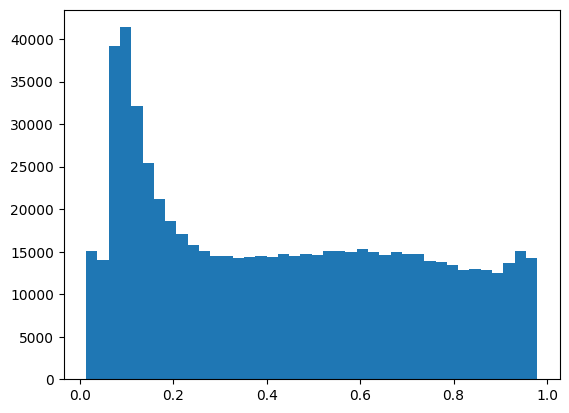

In [8]:
_ = plt.hist(df['smooth-or-featured_featured-or-disk_fraction'], bins=40)

### Optionally, join (back) to other Euclid catalogs (e.g. MER Catalog) on object_id

In [29]:
# this is the subset of the MER catalog used to select the cutouts, which I have handy
# but you can join to any Euclid table with object_id
cat = pd.read_csv('/Users/user/Downloads/v4_post_euclid_challenge_catalogs/_master_catalog.csv')
cat['object_id'] = cat['object_id'].astype(str)
df_with_cat = pd.merge(cat, df, on='object_id', how='inner', validate='one_to_one')
print(df_with_cat[['object_id', 'ra', 'dec', 'smooth-or-featured_featured-or-disk_fraction']].head())

### Try out some filters

In [9]:
 # all featured face-on galaxies
feat = df['smooth-or-featured_featured-or-disk_fraction'] > 0.5
face = df['disk-edge-on_no_fraction'] > 0.5
ff = df[feat & face]


,id_str,hdf5_loc,smooth-or-featured_smooth_fraction,smooth-or-featured_featured-or-disk_fraction,smooth-or-featured_problem_fraction,disk-edge-on_yes_fraction,disk-edge-on_no_fraction,has-spiral-arms_yes_fraction,has-spiral-arms_no_fraction,bar_strong_fraction,...,problem_star_fraction,problem_artifact_fraction,problem_zoom_fraction,artifact_satellite_fraction,artifact_scattered_fraction,artifact_diffraction_fraction,artifact_ray_fraction,artifact_saturation_fraction,artifact_other_fraction,artifact_ghost_fraction
1,F-006_102010567_-817369759609069843,grouped_across_models.hdf5,0.027161,0.958984,0.013748,0.014839,0.985352,0.987305,0.012726,0.268555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F-006_102010567_-817377117612312486,grouped_across_models.hdf5,0.029938,0.943359,0.026810,0.011719,0.988281,0.981445,0.018448,0.064087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,F-006_102010567_-817465724607797262,grouped_across_models.hdf5,0.344971,0.611328,0.043365,0.142334,0.857422,0.373535,0.625977,0.102112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,F-006_102010567_-817499623609661663,grouped_across_models.hdf5,0.415039,0.502441,0.082397,0.030792,0.969238,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,F-006_102010567_-817566095608206371,grouped_across_models.hdf5,0.020950,0.955078,0.024231,0.013817,0.986328,0.986328,0.013718,0.228271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669589,F-006_102043616_-914362078283953856,grouped_across_models.hdf5,0.087891,0.894531,0.017868,0.011314,0.988770,0.978516,0.021454,0.081177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669592,F-006_102043616_-914406525285955621,grouped_across_models.hdf5,0.215820,0.714844,0.069214,0.016296,0.983887,0.600586,0.399902,0.044006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669595,F-006_102043616_-914425580284659608,grouped_across_models.hdf5,0.175781,0.514648,0.309814,0.019348,0.980957,0.281006,0.718750,0.066956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669596,F-006_102043616_-914433765283007687,grouped_across_models.hdf5,0.307129,0.648438,0.044312,0.073730,0.926270,0.272461,0.727539,0.045654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Find strongly-barred galaxies

In [ ]:
# 10 of the most strongly-barred galaxies in Euclid
strong_bars = df.sort_values('bar_strong_fraction', ascending=False)[:100]

#### Find edge-on galaxies with boxy bulges (challenging!)

In [31]:
# edge = df['disk-edge-on_yes_fraction'] > 0.5
# e = df[edge]
# list(e.sort_values('edge-on-bulge_boxy_fraction', ascending=False)['object_id'])[:25]
df.sort_values('edge-on-bulge_boxy_fraction', ascending=False)['object_id'][:25]

['-761309773408367046',
 '-737332264451313511',
 '-815640485458828314',
 '-729891449444557991',
 '-923047342473764562',
 '-675735471360982716',
 '-839827995513988461',
 '-831355870535764382',
 '-951914164453123642',
 '-755974918394677901',
 '-707998790460830343',
 '-795289369416742198',
 '-834715476517900666',
 '-871602231569088498',
 '-792385714518287833',
 '-724363295447280139',
 '-825969659440442373',
 '-783879558416562405',
 '-909118617456213813',
 '-760088794459769911',
 '-731497980371951254',
 '-781607782532094923',
 '-942153829464431606',
 '-770291192514823268',
 '-939300934469058854']

### Very smooth galaxies to further search for strong lenses 

(remember Zoobot is only run on VIS < 20.5 or area > 1200px galaxies)

In [ ]:
very_smooth = df['smooth-or-featured_smooth_fraction'] > 0.8
